# Тестирование

Зачем тестировать:
- тесты проверяют корректность кода
- и позволяют бесстрашно изменять код даже в больших проектах.

### Пирамида тестирования

![https://habrastorage.org/getpro/habr/post_images/b6d/7a8/3ed/b6d7a83ed09e1a8046529bebfe02836e.png](https://habrastorage.org/getpro/habr/post_images/b6d/7a8/3ed/b6d7a83ed09e1a8046529bebfe02836e.png)

Декомпозиция программы на функции, классы и модули позволяет осуществлять модульное или компонентное тестирование (unit testing). Юниттесты — это способ проверить работу функции или метода отдельно от всей
программы, вместе взятой.

## Pytest

Пакет `py.test` — популярная альтернатива `unittest` для
написания и запуска тестов.
 Отличительная особенность py.test — практически
полное отсутствие API: тесты можно писать, используя
стандартные средства языка.


PyTest собирает все тесты сам по имени test_* (Test_* для имени классов) для всех файлов в папке (рекурсивно обходя вложенные папки) или же для указанного файла. То есть пример вызова будет иметь вид «py.test -v pytest_example.py»

In [8]:
# content of test_sample.py
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

### Фикстуры (Fixtures)

Fixtures — это функции, выполняемые pytest до (а иногда и после) фактических тестовых функций. Код в фикстуре может делать все, что вам необходимо. Вы можете использовать Fixtures, чтобы получить набор данных для тестирования. Вы можете использовать Fixtures, чтобы получить систему в известном состоянии перед запуском теста. Fixtures также используются для получения данных для нескольких тестов.

In [ ]:
import pytest

@pytest.fixture()
def some_data():
    """Return answer to ultimate question."""
    return 42

def test_some_data(some_data):
    """Use fixture return value in a test."""
    assert some_data == 42

## TDD (test-driven development) — разработка через тестирование
**TDD, test-driven development или процесс разработки через тестирование — это методология разработки программного обеспечения, которая основывается на повторении коротких циклов разработки: изначально пишется тест, покрывающий желаемое изменение, затем пишется программный код, который реализует желаемое поведение системы и позволит пройти написанный тест, а затем проводится рефакторинг написанного кода с постоянной проверкой прохождения всех тестов.**

Тестирование ПО — это процедура, которая позволяет подтвердить или опровергнуть работоспособность кода и корректность его работы. При тестировании приложению передаются входные данные и запрашивается выполнение некой команды, после чего производится проверка полученных результатов на соответствие эталону, если результат соответствует ожидаемому — тест считается пройденным. Эта процедура может быть автоматизирована, в этом случае проверка работоспособности и правильности работы приложения в сравнении с ручным тестированием осуществляется гораздо быстрее, полноценнее и фактически чаще.

Методика разработки через тестирование заключается в организации автоматического тестирования разрабатываемых приложений путем написания модульных, интеграционных и функциональных тестов, определяющих требования к коду непосредственно перед написанием этого самого кода. Сначала пишется тест, который проверяет корректность работы еще ненаписанного программного кода. Этот тест, разумеется, не проходит. После этого разработчик пишет код, который выполняет действия, требуемые для прохождения теста. После того, как тест успешно пройден, по необходимости осуществляется рефакторинг (доработка и переработка) написанного кода, причём в этом случае рефакторинг осуществляется уже под контролем прохождения тестов, что проще и надёжнее.

### Цикл разработки по TDD

- Добавить тест для новой (еще не реализованной) функциональности или для воспроизведения существующего бага
- Запустить все тесты и убедиться, что новый тест не проходит
- Написать код, который обеспечит прохождение теста: 
- Запустить тесты и убедиться, что они все прошли успешно: прохождение нового теста подтверждает реализацию нового функционала или исправление существующей ошибки, а прохождение остальных позволяет удостовериться, что ранее реализованный функционал работает по-прежнему корректно. 
- Заняться рефакторингом и оптимизацией — улучшение сопровождаемости и быстродействия целесообразно осуществлять уже после того, как получилось добиться проверяемой работоспособности
- Перезапустить тесты и убедиться, что они все ещё проходят успешно
- Повторить цикл

Эта методология позволяет добиться создания пригодного для автоматического тестирования приложения и очень хорошего покрытия кода тестами, так как ТЗ переводится на язык автоматических тестов, то есть всё, что программа должна делать, проверяется. Также TDD часто упрощает программную реализацию: так как исключается избыточность — если компонент проходит тест, то он считается готовым. Если же существующие тесты проходят, но работает компонент не так, как ожидается, то это значит, что тесты пока не отражают всех требований и это повод добавить новые тесты.

Архитектура программных продуктов, разрабатываемых таким образом, обычно лучше (в приложениях, которые пригодны для автоматического тестирования, обычно очень хорошо распределяется ответственность между компонентами, а выполняемые сложные процедуры декомпозированы на множество простых). Стабильность работы приложения, разработанного через тестирование, также выше за счёт того, что все основные функциональные возможноси программы покрыты тестами и их работоспособность постоянно проверяется. Сопровождаемость проектов, где тестируется всё или практически всё, очень высока — разработчики могут не бояться вносить изменения в код, если что-то пойдёт не так, то об этом сообщат результаты автоматического тестирования.

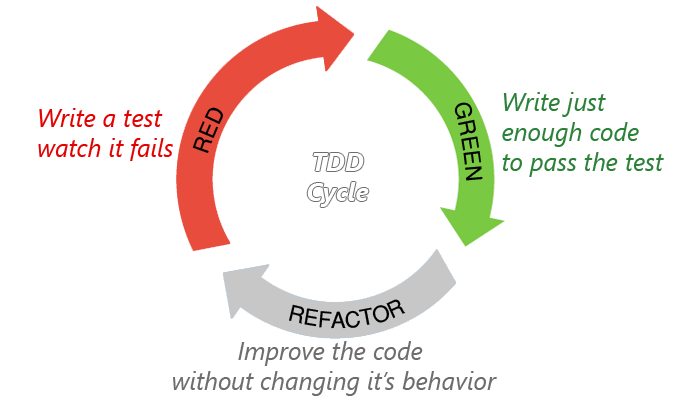